In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
lalitharajesh_haarcascades_path = kagglehub.dataset_download('lalitharajesh/haarcascades')
andrewmvd_face_mask_detection_path = kagglehub.dataset_download('andrewmvd/face-mask-detection')
ashishjangra27_face_mask_12k_images_dataset_path = kagglehub.dataset_download('ashishjangra27/face-mask-12k-images-dataset')

print('Data source import complete.')


100%|██████████| 1.45M/1.45M [00:00<00:00, 83.5MB/s]

Extracting files...


Data source import complete.


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
from scipy.spatial import distance
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Output streaming akan dipotong hingga 5000 baris terakhir.
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train/WithMask/Augmented_86_5723952.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train/WithMask/Augmented_198_2963185.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train/WithMask/Augmented_547_2412875.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train/WithMask/Augmented_194_956143.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train/WithMask/Augmented_152_6932890.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train/WithMask/Augmented_584_5772798.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train/WithMask/Augmented_727_6582459.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train/WithMask/Augmented_366_9449569.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train/WithMask/Augmented_414_8978470.png
/kaggle/input/face-mask-1

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Mask and Social distancing Detection

![d8ce0480-9ac0-11ea-8062-809a1b8bfab6.png](attachment:d8ce0480-9ac0-11ea-8062-809a1b8bfab6.png)

**Social distancing**, also called **“physical distancing,”** means keeping a safe space between yourself and other people who are not from your household.

To practice social or physical distancing, stay at least 6 feet (about 2 arm lengths) from other people who are not from your household in both indoor and outdoor spaces.

**Objective** is to build a Deep Learning model which can identify if the person is wearing a mask or not, also detecting if people vilating social distancing norms.

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
from scipy.spatial import distance
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Output streaming akan dipotong hingga 5000 baris terakhir.
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train/WithMask/Augmented_86_5723952.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train/WithMask/Augmented_198_2963185.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train/WithMask/Augmented_547_2412875.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train/WithMask/Augmented_194_956143.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train/WithMask/Augmented_152_6932890.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train/WithMask/Augmented_584_5772798.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train/WithMask/Augmented_727_6582459.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train/WithMask/Augmented_366_9449569.png
/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train/WithMask/Augmented_414_8978470.png
/kaggle/input/face-mask-1

### Using haar cascade to detect faces

Object Detection using Haar feature-based cascade classifiers is an effective object detection method proposed by Paul Viola and Michael Jones in their paper, "Rapid Object Detection using a Boosted Cascade of Simple Features" in 2001. It is a machine learning based approach where a cascade function is trained from a lot of positive and negative images. It is then used to detect objects in other images. We'll be using a Haar Cascade Model trained to detect faces in order to obtain the bounding box coordinates of faces in an image.

In [5]:
#loading haarcascade_frontalface_default.xml
face_model = cv2.CascadeClassifier('../input/haarcascades/haarcascade_frontalface_default.xml')

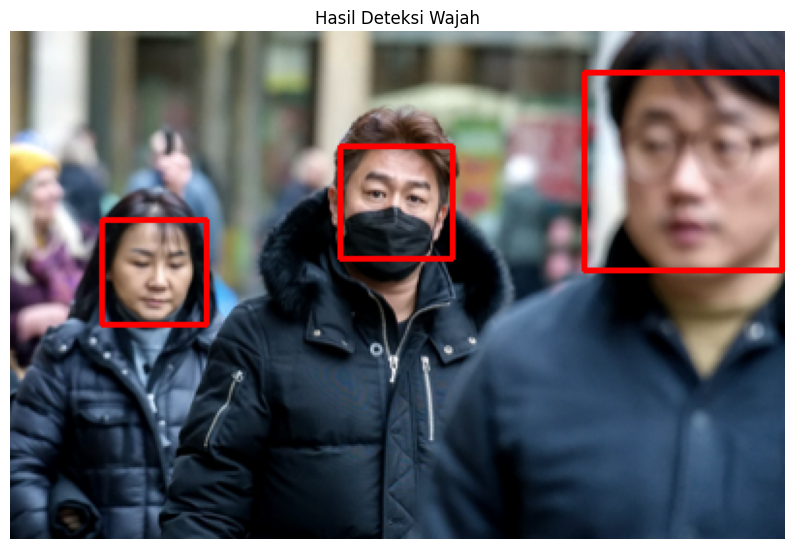

In [7]:
import cv2
import matplotlib.pyplot as plt
import os

# Periksa apakah file ada
img_path = '/content/maksssksksss244.png'

if not os.path.exists(img_path):
    print(f"Gambar tidak ditemukan: {img_path}")
else:
    img = cv2.imread(img_path)

    # Validasi gambar berhasil dibaca
    if img is None:
        print("Gagal membaca gambar, cek file gambar Anda.")
    else:
        # Konversi ke grayscale yang benar
        gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Load face detector (menggunakan Haar cascades sebagai contoh)
        face_model = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

        # Deteksi wajah
        faces = face_model.detectMultiScale(gray_img, scaleFactor=1.1, minNeighbors=4)

        # Plot hasil
        out_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        for (x, y, w, h) in faces:
            cv2.rectangle(out_img, (x, y), (x + w, y + h), (255, 0, 0), 2)

        plt.figure(figsize=(10, 10))
        plt.imshow(out_img)
        plt.axis('off')
        plt.title('Hasil Deteksi Wajah')
        plt.show()

### Detecting social distancing violations

This can be done by iterating over the coordinates of faces and calculating the distance for each possible pair, if the distance for a particular pair is less than MIN_DISTANCE then the bounding boxes for those faces are colored red. MIN_DISTANCE must be manually initialized in such a way that it corresponds to the minimum allowable distance in real life (ex. 6ft in India).

In [8]:
MIN_DISTANCE = 130

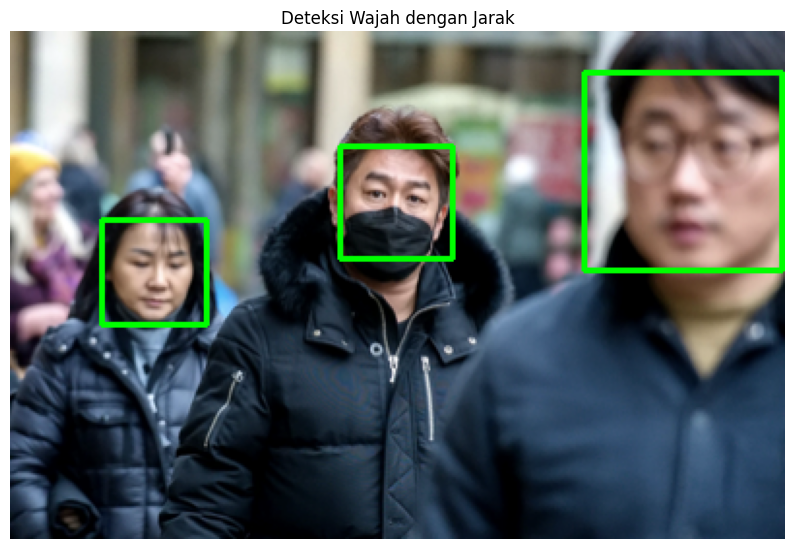

In [9]:
import cv2
import matplotlib.pyplot as plt
from scipy.spatial import distance
import os

# Parameter yang digunakan
MIN_DISTANCE = 100  # contoh jarak minimal yang dianggap terlalu dekat

# Load gambar
img_path = '/content/maksssksksss244.png'

if not os.path.exists(img_path):
    print(f"Gambar tidak ditemukan: {img_path}")
else:
    img = cv2.imread(img_path)

    if img is None:
        print("Gagal membaca gambar, pastikan file tersedia dan valid.")
    else:
        gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Load face detection model (Haar cascades)
        face_model = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

        # Deteksi wajah pada gambar
        faces = face_model.detectMultiScale(gray_img, scaleFactor=1.1, minNeighbors=4)

        if len(faces) >= 2:
            label = [0 for _ in range(len(faces))]
            for i in range(len(faces) - 1):
                for j in range(i + 1, len(faces)):
                    dist = distance.euclidean(faces[i][:2], faces[j][:2])
                    if dist < MIN_DISTANCE:
                        label[i] = 1
                        label[j] = 1

            new_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

            for i in range(len(faces)):
                (x, y, w, h) = faces[i]
                if label[i] == 1:
                    cv2.rectangle(new_img, (x, y), (x + w, y + h), (255, 0, 0), 2)  # terlalu dekat (biru)
                else:
                    cv2.rectangle(new_img, (x, y), (x + w, y + h), (0, 255, 0), 2)  # jarak aman (hijau)

            plt.figure(figsize=(10, 10))
            plt.imshow(new_img)
            plt.axis('off')
            plt.title('Deteksi Wajah dengan Jarak')
            plt.show()
        else:
            print("Jumlah wajah yang terdeteksi kurang dari 2.")

In [10]:
!pip install tensorflow keras

#### Red box shows violation of social distancing.

### Using VGG19 for mask detection


In [11]:
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [12]:
import zipfile

local_zip = 'archive.zip'
try:
    with zipfile.ZipFile(local_zip, 'r') as zip_ref:
        zip_ref.extractall('/content/face-mask-detection-dataset/')
    print('Ekstraksi berhasil.')
except zipfile.BadZipFile:
    print('File zip rusak atau tidak valid.')

Ekstraksi berhasil.


In [13]:
import zipfile

local_zip = 'train.zip'
try:
    with zipfile.ZipFile(local_zip, 'r') as zip_ref:
        zip_ref.extractall('/content/face-mask-12k-images-dataset/')
    print('Ekstraksi berhasil.')
except zipfile.BadZipFile:
    print('File zip rusak atau tidak valid.')

Ekstraksi berhasil.


In [15]:
# Menghapus berkas zip yang sudah tidak diperlukan
!rm train.zip

In [ ]:
# Menghapus berkas zip yang sudah tidak diperlukan
!rm archive.zip

In [16]:
#Load train and test set
train_dir = '../content/face-mask-12k-images-dataset/Face Mask Dataset/Train'
test_dir = '../content/face-mask-12k-images-dataset/Face Mask Dataset/Test'
val_dir = '../content/face-mask-12k-images-dataset/Face Mask Dataset/Validation'

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# definisi direktori yang benar
train_dir = '/content/face-mask-12k-images-dataset/Face Mask Dataset/Train'
val_dir = '/content/face-mask-12k-images-dataset/Face Mask Dataset/Validation'
test_dir = '/content/face-mask-12k-images-dataset/Face Mask Dataset/Test'

# cek apakah direktori sudah benar
assert os.path.exists(train_dir), f"Direktori {train_dir} tidak ditemukan."
assert os.path.exists(val_dir), f"Direktori {val_dir} tidak ditemukan."
assert os.path.exists(test_dir), f"Direktori {test_dir} tidak ditemukan."

# Data augmentation
train_datagen = ImageDataGenerator(rescale=1.0/255, horizontal_flip=True, zoom_range=0.2, shear_range=0.2)
train_generator = train_datagen.flow_from_directory(
    directory=train_dir,
    target_size=(128,128),
    class_mode='categorical',
    batch_size=32
)

val_datagen = ImageDataGenerator(rescale=1.0/255)
val_generator = val_datagen.flow_from_directory(
    directory=val_dir,
    target_size=(128,128),
    class_mode='categorical',
    batch_size=32
)

test_datagen = ImageDataGenerator(rescale=1.0/255)
test_generator = test_datagen.flow_from_directory(
    directory=test_dir,
    target_size=(128,128),
    class_mode='categorical',
    batch_size=32
)

Found 10000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Found 992 images belonging to 2 classes.


In [21]:
# Data augmentation

train_datagen = ImageDataGenerator(rescale=1.0/255, horizontal_flip=True, zoom_range=0.2,shear_range=0.2)
train_generator = train_datagen.flow_from_directory(directory=train_dir,target_size=(128,128),class_mode='categorical',batch_size=32)

val_datagen = ImageDataGenerator(rescale=1.0/255)
val_generator = train_datagen.flow_from_directory(directory=val_dir,target_size=(128,128),class_mode='categorical',batch_size=32)

test_datagen = ImageDataGenerator(rescale=1.0/255)
test_generator = train_datagen.flow_from_directory(directory=val_dir,target_size=(128,128),class_mode='categorical',batch_size=32)

Found 10000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


### Building VGG19 transfer learning model.

In [22]:
vgg19 = VGG19(weights='imagenet',include_top=False,input_shape=(128,128,3))

for layer in vgg19.layers:
    layer.trainable = False

model = Sequential()
model.add(vgg19)
model.add(Flatten())
model.add(Dense(2,activation='sigmoid'))
model.summary()

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg19 (Functional)              │ (None, 4, 4, 512)      │    20,024,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2)              │        16,386 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,040,770 (76.45 MB)

 Trainable params: 16,386 (64.01 KB)

 Non-trainable params: 20,024,384 (76.39 MB)

In [26]:
# model.compile(optimizer="adam",loss="categorical_crossentropy",metrics ="accuracy")
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [28]:
# history = model.fit_generator(generator=train_generator,
#                               steps_per_epoch=len(train_generator)//32,
#                               epochs=20,validation_data=val_generator,
#                               validation_steps=len(val_generator)//32)
history = model.fit(train_generator,
                    steps_per_epoch=len(train_generator)//32,
                    epochs=20,
                    validation_data=val_generator,
                    validation_steps=len(val_generator)//32)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 244s 29s/step - accuracy: 0.6475 - loss: 0.6065 - val_accuracy: 0.9100 - val_loss: 0.2551
Epoch 2/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 250s 31s/step - accuracy: 0.8900 - loss: 0.2784 - val_accuracy: 0.9237 - val_loss: 0.2228
Epoch 3/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 242s 29s/step - accuracy: 0.9397 - loss: 0.1769 - val_accuracy: 0.9375 - val_loss: 0.1494
Epoch 4/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 245s 30s/step - accuracy: 0.9560 - loss: 0.1197 - val_accuracy: 0.9575 - val_loss: 0.1294
Epoch 5/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 266s 32s/step - accuracy: 0.9628 - loss: 0.1086 - val_accuracy: 0.9575 - val_loss: 0.1105
Epoch 6/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 266s 32s/step - accuracy: 0.9703 - loss: 0.1065 - val_accuracy: 0.9663 - val_loss: 0.0976
Epoch 7/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 244s 29s/step - accuracy: 0.9785 - loss: 0.0732 - val_accuracy: 0.9625 - val_loss: 0.1016
Epoch 8/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 242s 29s/step - accuracy: 0.9638 - loss: 0.0936 - val_accuracy: 0.9725 - val_loss:

In [31]:
# model.evaluate_generator(test_generator)
loss, accuracy = model.evaluate(test_generator)
print(f"Loss: {loss}, Accuracy: {accuracy}")

25/25 ━━━━━━━━━━━━━━━━━━━━ 179s 7s/step - accuracy: 0.9802 - loss: 0.0603
Loss: 0.05396388843655586, Accuracy: 0.9825000166893005


Our modela achieved 98% accuracy on test data.

### Testing the model on the test data

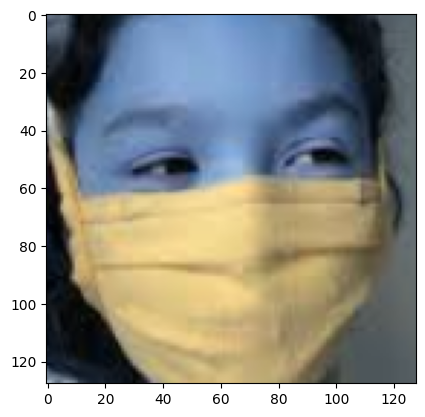

In [33]:
sample_mask_img = cv2.imread('/content/face-mask-12k-images-dataset/Face Mask Dataset//Test/WithMask/1565.png')
sample_mask_img = cv2.resize(sample_mask_img,(128,128))
plt.imshow(sample_mask_img)
sample_mask_img = np.reshape(sample_mask_img,[1,128,128,3])
sample_mask_img = sample_mask_img/255.0

In [34]:
model.predict(sample_mask_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 751ms/step


array([[0.9775989 , 0.04588172]], dtype=float32)

The model is able to classify if the person is wearing a mask or not.

### Save the model.

In [35]:
model.save('masknet.h5')

### Integrating with haar cascade

We now take crops of the faces detected in the image and use the model trained in the above section to determine whether the individual faces have a mask or not.

In [36]:
mask_label = {0:'MASK',1:'NO MASK'}
dist_label = {0:(0,255,0),1:(255,0,0)}

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


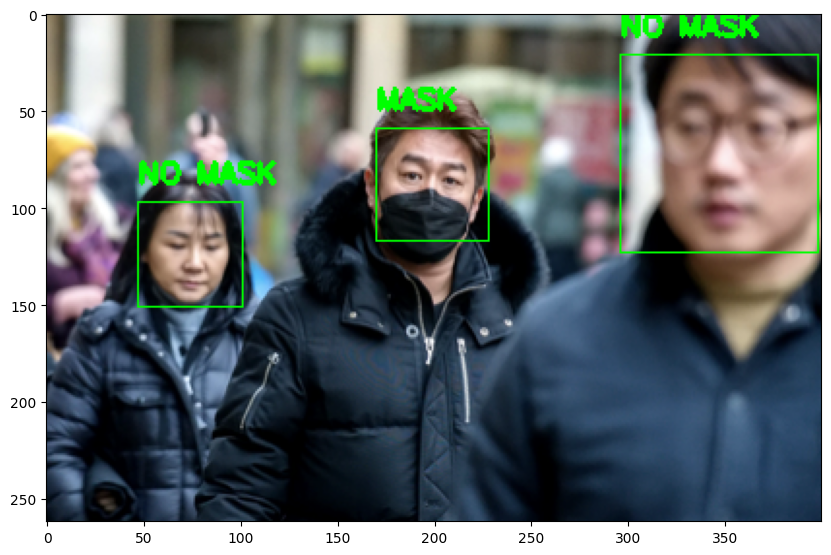

In [37]:
if len(faces)>=2:
    label = [0 for i in range(len(faces))]
    for i in range(len(faces)-1):
        for j in range(i+1, len(faces)):
            dist = distance.euclidean(faces[i][:2],faces[j][:2])
            if dist<MIN_DISTANCE:
                label[i] = 1
                label[j] = 1
    new_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR) #colored output image
    for i in range(len(faces)):
        (x,y,w,h) = faces[i]
        crop = new_img[y:y+h,x:x+w]
        crop = cv2.resize(crop,(128,128))
        crop = np.reshape(crop,[1,128,128,3])/255.0
        mask_result = model.predict(crop)
        cv2.putText(new_img,mask_label[mask_result.argmax()],(x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.5,dist_label[label[i]],2)
        cv2.rectangle(new_img,(x,y),(x+w,y+h),dist_label[label[i]],1)
    plt.figure(figsize=(10,10))
    plt.imshow(new_img)

else:
    print("No. of faces detected is less than 2")

#### Red boxes shows violation of social distancing.